In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as p

from IPython.core.magic import register_cell_magic
@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)


import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from qiskit import *
from qiskit_ibm_provider import *
from qiskit_ibm_runtime import *
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score, KFold
#Import classical libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import functools

import pandas as pd
import seaborn as sns
import time
import psutil
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.primitives import Sampler

sampler = Sampler()

In [3]:
import pandas as pd

df = pd.read_csv('citrus.csv',sep=',')
df = df.sample(1500)
"""
data_labels = df.iloc[:, 0].values
data_features = df.iloc[:, 1:].values
"""

'\ndata_labels = df.iloc[:, 0].values\ndata_features = df.iloc[:, 1:].values\n'

In [4]:
print(df.columns)


Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')


In [5]:
print(df.head())


            name  diameter  weight  red  green  blue
4690      orange     10.41  181.50  145     73     2
6569  grapefruit     10.88  188.19  151     67     6
3786      orange      9.33  165.82  164     77     6
929       orange      7.36  136.04  157     93     2
8061  grapefruit     11.82  203.06  152     86    26


In [6]:
print(df.shape)


(1500, 6)


In [7]:
print(df.dtypes)


name         object
diameter    float64
weight      float64
red           int64
green         int64
blue          int64
dtype: object


In [8]:
df.describe()

,diameter,weight,red,green,blue
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,10.020513,175.780707,153.842667,75.780000,11.254667
std,1.949341,29.250312,10.283210,11.684518,8.928771
min,4.420000,95.170000,119.000000,40.000000,2.000000
25%,8.460000,152.402500,147.000000,68.000000,2.000000
50%,10.050000,175.805000,154.000000,76.000000,10.000000
75%,11.522500,198.532500,161.000000,84.000000,17.000000
max,14.850000,249.050000,189.000000,109.000000,44.000000


In [9]:
df_labels = df['name']
df.drop(['name'], axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(df, df_labels, test_size=0.2, random_state=42)

#pca = PCA(n_components=2)
pca = PCA(n_components=2)
pca.fit(x_train, y_train)
df_pca_train = pca.transform(x_train)
df_pca_test = pca.transform(x_test)
df_pca_train = pd.DataFrame(data = df_pca_train
             , columns = ['pc_1', 'pc_2'])

df_pca_test = pd.DataFrame(data = df_pca_test
             , columns = ['pc_1', 'pc_2'])
df_pca_train.head()

,pc_1,pc_2
0,-1.908786,13.265173
1,-19.654700,-6.020563
2,49.474633,22.821543
3,24.342580,-4.899869
4,0.153890,6.795131


In [10]:
n_dim = len(df_pca_train.columns)
n_dim

2

In [11]:

sample_train, sample_test, label_train, label_test = train_test_split(
     df_pca_train, y_train, test_size=0.2, random_state=22)

# Normalize

sample_train = sample_train.to_numpy()
sample_test = sample_test.to_numpy()

std_scale = StandardScaler().fit(sample_train)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)

# Scale for better fit within the feature map

samples = np.append(sample_train, sample_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
sample_train = minmax_scale.transform(sample_train)
sample_test = minmax_scale.transform(sample_test)

train_size = 800
sample_train = sample_train[:train_size]
label_train = label_train[:train_size]

test_size = 200
sample_test = sample_test[:test_size]
label_test = label_test[:test_size]

In [12]:
"""
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import time

df = pd.DataFrame({
    'Component 0': data_features[:, 0],
    'Component 1': data_features[:, 1],
    'Component 2': data_features[:, 2],
    'label': data_labels
})

fig = px.scatter_3d(df, x='Component 0', y='Component 1', z='Component 2', color='label')
fig.show()
"""

"\nimport plotly.express as px\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport time\n\ndf = pd.DataFrame({\n    'Component 0': data_features[:, 0],\n    'Component 1': data_features[:, 1],\n    'Component 2': data_features[:, 2],\n    'label': data_labels\n})\n\nfig = px.scatter_3d(df, x='Component 0', y='Component 1', z='Component 2', color='label')\nfig.show()\n"

In [13]:
num_features = n_dim

In [14]:
print("Before Sampling the Data", x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print("After Sampling the Data", sample_train.shape, sample_test.shape, label_train.shape, label_test.shape)

Before Sampling the Data (1200, 5) (300, 5) (1200,) (300,)
After Sampling the Data (800, 2) (200, 2) (800,) (200,)


In [15]:
"""
corp_perc = 80

corp_split = int(corp_perc * data.shape[0] // 100)

four_indices = np.random.choice(np.arange(data.shape[0] // 2), corp_split // 2, replace=False)
nine_indices = np.random.choice(np.arange(data.shape[0] // 2, data.shape[0]), corp_split // 2, replace=False)
my_data_orange = data.iloc[four_indices] 
my_data_grapefruit = data.iloc[nine_indices] 

my_data = pd.concat([my_data_orange, my_data_grapefruit])

test_perc = 100 - corp_perc
semi_split = int(test_perc * my_data.shape[0] // 100)

# Creating training and testing input dictionaries
training_input = {'A': my_data_orange.iloc[:-semi_split, 1:], 'B': my_data_grapefruit.iloc[:-semi_split, 1:]}
test_input = {'A': my_data_orange.iloc[-semi_split:, 1:], 'B': my_data_grapefruit.iloc[-semi_split:, 1:]}
testing_input = pd.concat([my_data_orange.iloc[-semi_split:, 1:], my_data_grapefruit.iloc[-semi_split:, 1:]])
testing_labels = pd.concat([my_data_orange.iloc[-semi_split:, :1], my_data_grapefruit.iloc[-semi_split:, :1]])

# Prepare the training and testing datasets
x_train = pd.concat([training_input['A'], training_input['B']]).values
y_train = np.concatenate((np.zeros(len(training_input['A'])), np.ones(len(training_input['B']))))
x_test = testing_input.values
y_test = np.concatenate((np.zeros(len(test_input['A'])), np.ones(len(test_input['B']))))

# Print the lengths of the datasets
print("Length of x_train:", len(x_train))
print("Length of y_train:", len(y_train))
print("Length of x_test:", len(x_test))
print("Length of y_test:", len(y_test))
"""

'\ncorp_perc = 80\n\ncorp_split = int(corp_perc * data.shape[0] // 100)\n\nfour_indices = np.random.choice(np.arange(data.shape[0] // 2), corp_split // 2, replace=False)\nnine_indices = np.random.choice(np.arange(data.shape[0] // 2, data.shape[0]), corp_split // 2, replace=False)\nmy_data_orange = data.iloc[four_indices] \nmy_data_grapefruit = data.iloc[nine_indices] \n\nmy_data = pd.concat([my_data_orange, my_data_grapefruit])\n\ntest_perc = 100 - corp_perc\nsemi_split = int(test_perc * my_data.shape[0] // 100)\n\n# Creating training and testing input dictionaries\ntraining_input = {\'A\': my_data_orange.iloc[:-semi_split, 1:], \'B\': my_data_grapefruit.iloc[:-semi_split, 1:]}\ntest_input = {\'A\': my_data_orange.iloc[-semi_split:, 1:], \'B\': my_data_grapefruit.iloc[-semi_split:, 1:]}\ntesting_input = pd.concat([my_data_orange.iloc[-semi_split:, 1:], my_data_grapefruit.iloc[-semi_split:, 1:]])\ntesting_labels = pd.concat([my_data_orange.iloc[-semi_split:, :1], my_data_grapefruit.iloc

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from qiskit import *
from qiskit_ibm_provider import *
from qiskit_ibm_runtime import *
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from qiskit.primitives import Sampler, Estimator
"""
# IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import Estimator, Sampler, Session
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
 
# get a real backend from the runtime service
#backend = service.get_backend('ibmq_manila')
 
# generate a simulator that mimics the real quantum system with the latest calibration results
#backend_sim = AerSimulator.from_backend(backend)
# Add your token below

service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.get_backend("ibm_kyoto")
#backend = FakeManilaV2()

session = Session(backend=backend)
#estimator = Estimator(session=session)
sampler = Sampler(session = session)
"""
estimator = Estimator()
sampler = Sampler()
import pandas as pd
import seaborn as sns
import time
import psutil
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.primitives import Sampler

In [17]:
%%write_and_run feature_map.py
import numpy as np
from qiskit import QuantumCircuit 
from qiskit.circuit import ParameterVector

def feature_map(num_qubits): 
    reps = 3
    feature_map_circuit = QuantumCircuit(num_qubits)
    x = ParameterVector('x', length=num_qubits)
    for _ in range(reps):
        for i in range(num_qubits):
            feature_map_circuit.rx(x[i], i)
            feature_map_circuit.rz(x[i], i)
            feature_map_circuit.barrier()
        for control in range(num_qubits-1, 0, -1):
            target = control - 1
            feature_map_circuit.rx(x[target], target)
            feature_map_circuit.cx(control, target)
            feature_map_circuit.rx(x[target], target)
            feature_map_circuit.barrier()
        for i in range(num_qubits):
            feature_map_circuit.rx(x[i], i)
            feature_map_circuit.rz(x[i], i)
        feature_map_circuit.barrier()

    return feature_map_circuit, num_qubits


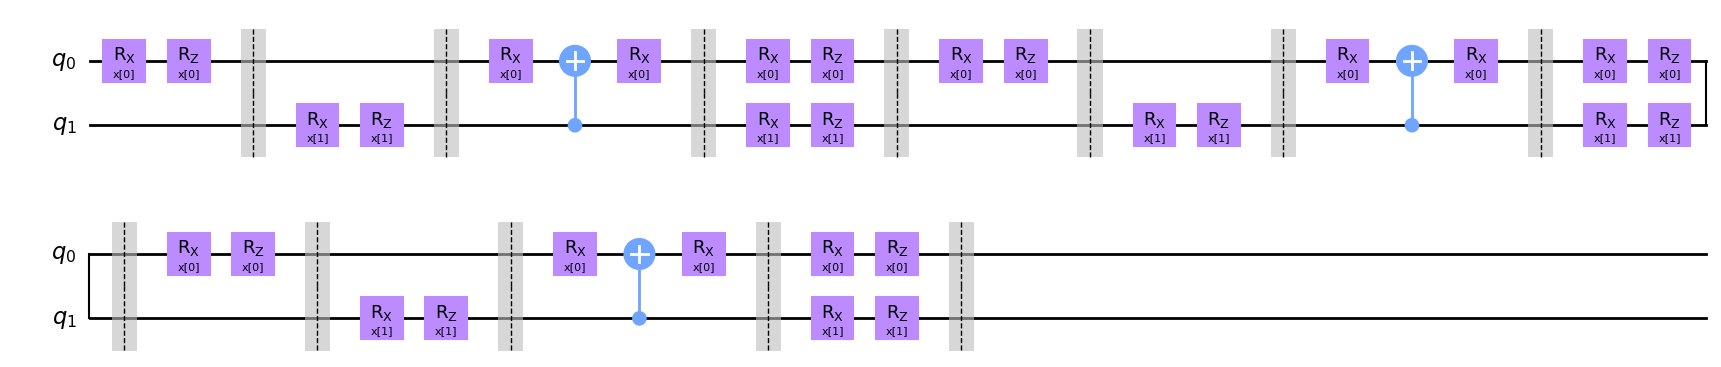

In [18]:
feature_map_circuit, num_qubits = feature_map(num_qubits=num_features)
feature_map_circuit.draw(output='mpl', style='clifford')

In [19]:
%%write_and_run variational_circuit.py
    
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
    

def variational_circuit():
    num_qubits = num_features           
    reps = 3
    x = ParameterVector('L', length=(num_qubits*(reps+1)*(reps+1)))
    var_circuit = QuantumCircuit(num_qubits)
    count = 0
    for _ in range(reps):
        for i in range(num_qubits):
            var_circuit.ry(x[count], i)
            count+=1
        for i in range(num_qubits):
            var_circuit.rz(x[count], i)
            count+=1
        for i in range(num_qubits):
            for j in range(i+1,num_qubits):
                var_circuit.cx(i,j)
        var_circuit.x(0)
 
    for i in range(num_qubits):
        var_circuit.ry(x[count], i)
        count+=1
    for i in range(num_qubits):
        var_circuit.rz(x[count], i)
        count+=1
    
    return var_circuit

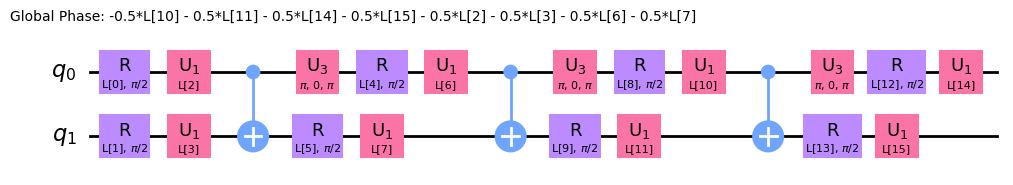

In [20]:
variational_circuit_circuit = variational_circuit()
variational_circuit_circuit.decompose().draw(output='mpl', style='clifford')

In [21]:
feature_map_circuit.depth(), variational_circuit_circuit.depth(), 

(27, 14)

In [22]:
"""
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp, random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2 as Estimator
 
n_qubits = 127
 
rng = np.random.default_rng(1234)
mat = np.real(random_hermitian(n_qubits, seed=rng))
circuit = IQP(mat)
mat = np.real(random_hermitian(n_qubits, seed=rng))
another_circuit = IQP(mat)
observable = SparsePauliOp("X" * n_qubits)
another_observable = SparsePauliOp("Y" * n_qubits)
 
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)
another_isa_circuit = pm.run(another_circuit)
isa_observable = observable.apply_layout(isa_circuit.layout)
another_isa_observable = another_observable.apply_layout(another_isa_circuit.layout)
 
service = QiskitRuntimeService()
 
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
 
with Session(service=service, backend=backend) as session:
    estimator = Estimator(session=session)
 
    estimator.options.optimization_level = 1
    estimator.options.resilience_level = 1
 
    job = estimator.run(transpiled_feature_map)
    another_job = estimator.run(transpiled_var_circ)
    result = job.result()
    another_result = another_job.result()

"""

'\nimport numpy as np\nfrom qiskit.circuit.library import IQP\nfrom qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager\nfrom qiskit.quantum_info import SparsePauliOp, random_hermitian\nfrom qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2 as Estimator\n \nn_qubits = 127\n \nrng = np.random.default_rng(1234)\nmat = np.real(random_hermitian(n_qubits, seed=rng))\ncircuit = IQP(mat)\nmat = np.real(random_hermitian(n_qubits, seed=rng))\nanother_circuit = IQP(mat)\nobservable = SparsePauliOp("X" * n_qubits)\nanother_observable = SparsePauliOp("Y" * n_qubits)\n \npm = generate_preset_pass_manager(optimization_level=1, backend=backend)\nisa_circuit = pm.run(circuit)\nanother_isa_circuit = pm.run(another_circuit)\nisa_observable = observable.apply_layout(isa_circuit.layout)\nanother_isa_observable = another_observable.apply_layout(another_isa_circuit.layout)\n \nservice = QiskitRuntimeService()\n \nbackend = service.least_busy(operational=True, simulat

In [23]:
cls_opt = COBYLA(maxiter=100, tol=0.001)

In [24]:
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
qc = QNNCircuit(num_qubits=num_qubits, feature_map = feature_map_circuit, ansatz= variational_circuit_circuit)
qc.decompose().draw("mpl", style="clifford")
estimator_qnn = EstimatorQNN(circuit=qc, estimator=estimator)

In [25]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals))
    , objective_func_vals)
    plt.show()

In [26]:
print("Sample train shape:", sample_train.shape)
print("Label train shape:", label_train.shape)

print("Sample train:")
print(sample_train[:5])  
print("Label train:")
print(label_train[:5])


Sample train shape: (800, 2)
Label train shape: (800,)
Sample train:
[[ 0.34174066  0.06701382]
 [-0.71279277  0.09895415]
 [ 0.19110502  0.24905625]
 [ 0.15464913 -0.3709887 ]
 [ 0.65977113 -0.09490241]]
Label train:
1613        orange
9524    grapefruit
2916        orange
3570        orange
282         orange
Name: name, dtype: object


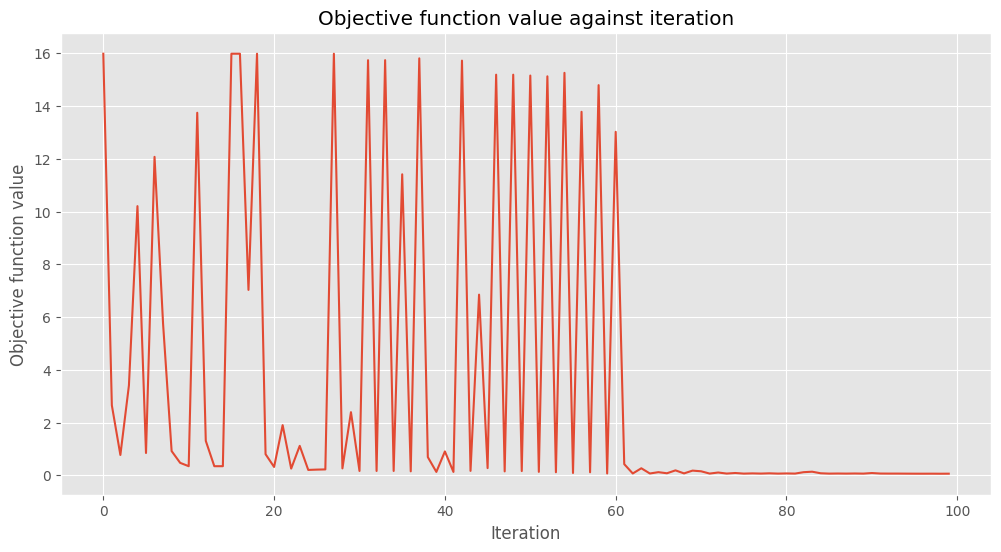

Training time: 118 seconds


In [28]:
import pandas as pd

estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, 
    optimizer=cls_opt, 
    callback=callback_graph, 
    loss='cross_entropy',
)

from sklearn.preprocessing import LabelEncoder

sample_train_df = pd.DataFrame(sample_train, columns=['feature_1', 'feature_2'])

label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(label_train)

start = time.time()
estimator_classifier.fit(sample_train_df, encoded_labels)
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")



In [29]:
predicted_labels_train = estimator_classifier.predict(sample_train)
predicted_labels_test = estimator_classifier.predict(sample_test)

predicted_labels_train = predicted_labels_train.astype(int)
predicted_labels_test = predicted_labels_test.astype(int)

predicted_labels_train_str = label_encoder.inverse_transform(predicted_labels_train)
predicted_labels_test_str = label_encoder.inverse_transform(predicted_labels_test)

train_score_q2_ra = accuracy_score(label_train, predicted_labels_train_str)
test_score_q2_ra = accuracy_score(label_test, predicted_labels_test_str)

print(f"EstimatorQNN on the training dataset using TwoLocal: {train_score_q2_ra:.2f}")
print(f"EstimatorQNN on the test dataset using TwoLocal:     {test_score_q2_ra:.2f}")


EstimatorQNN on the training dataset using TwoLocal: 0.48
EstimatorQNN on the test dataset using TwoLocal:     0.49


In [ ]:
estimator_classifier.weights

array([ 1.14341067,  0.24489591,  0.08845145,  0.47583737, -0.0192359 ,
        0.21698329,  0.03332002, -0.08346667,  0.81450234,  0.21573455,
       -0.03885986,  0.50044893,  1.72042988,  0.87661795,  0.13382118,
       -0.04875047])